In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

In [4]:
import os 
files = [x for x in os.listdir() if x.endswith('.csv')]
files

['loc_data.csv']

In [5]:
df = pd.read_csv('loc_data.csv')

In [6]:
df.drop(['logDate_unix','visit_time_unix'], inplace=True, axis=1)

In [6]:
df.head()

,device_id,logDate,visit_time,latitude,longitude,SearchId,search_listing_type,search_maxprice,search_property,search_longitude,search_latitude
0,8966BE56-6F65-415E-8188-A419282DD107,2017-10-26 09:44:00.850888 UTC,2017-10-26 09:44:00 UTC,1.463561,103.836630,F8D2E081-D21F-463B-A525-36BFB5DFF73F,rent,1000.0,I,NaN,NaN
1,0BCF4543-F9F5-48E4-BF5C-8F06463E8DF4,2017-10-31 08:02:36.646909 UTC,2017-10-31 08:02:36 UTC,1.283665,103.853285,0E334395-E485-46F2-9275-EFA5C3D82851,sale,5000000.0,I,NaN,NaN
2,E7CB599B-C425-4B2E-93DF-58AD8122320D,2017-10-25 09:41:30.333612 UTC,2017-10-25 09:41:29 UTC,1.391648,103.836486,0075614F-D82C-49C9-B373-872FB5E152D8,sale,20000000.0,I,NaN,NaN
3,620397F8-5B25-4E78-BACF-5103262D6F6E,2017-10-26 02:13:07.892744 UTC,2017-10-26 02:12:55 UTC,1.357901,103.940721,EE5C0E82-99D3-4CB3-845E-1E0F983704A6,sale,300000.0,O,NaN,NaN
4,0F0D0904-E1EF-4A80-A2CB-D9711D1A47DF,2017-10-25 09:23:48.519302 UTC,2017-10-25 09:23:47 UTC,1.291885,103.839961,C069816A-983F-4C71-8DE8-80493977572D,rent,20000.0,O,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149388 entries, 0 to 149387
Data columns (total 11 columns):
device_id              149388 non-null object
logDate                149388 non-null object
visit_time             149388 non-null object
latitude               149388 non-null float64
longitude              149388 non-null float64
SearchId               149388 non-null object
search_listing_type    149388 non-null object
search_maxprice        41639 non-null float64
search_property        60140 non-null object
search_longitude       29539 non-null float64
search_latitude        29539 non-null float64
dtypes: float64(5), object(6)
memory usage: 12.5+ MB


In [8]:
df.columns = ['deviceID','logDate','visitTime','lat','long','searchID','searchType','maxPrice','propType','searchLong','searchLat']

In [9]:
df.describe()

,lat,long,maxPrice,searchLong,searchLat
count,149388.000000,149388.000000,4.163900e+04,29539.000000,29539.000000
mean,1.986114,102.942817,1.119326e+06,103.840674,1.333832
std,5.205912,13.751884,3.185459e+06,0.141937,0.330422
min,-42.890757,-123.025961,5.000000e+02,88.082727,-38.531977
25%,1.308975,103.806494,3.000000e+03,103.800957,1.308021
50%,1.335136,103.848836,5.000000e+05,103.845398,1.330306
75%,1.371310,103.893256,1.500000e+06,103.885144,1.356832
max,59.348471,174.859170,5.000000e+07,103.988663,1.461180


In [10]:
df.describe(include=[np.object])

,deviceID,logDate,visitTime,searchID,searchType,propType
count,149388,149388,149388,149388,149388,60140
unique,14017,42805,41076,149388,2,7
top,2EC1574D-3261-4265-9EAE-48B33D034931,2017-10-28 01:03:06.667579 UTC,2017-10-28 01:03:10 UTC,A42CD752-006B-4434-97A8-34CEDCC11C27,sale,N
freq,554,93,93,1,98275,27139


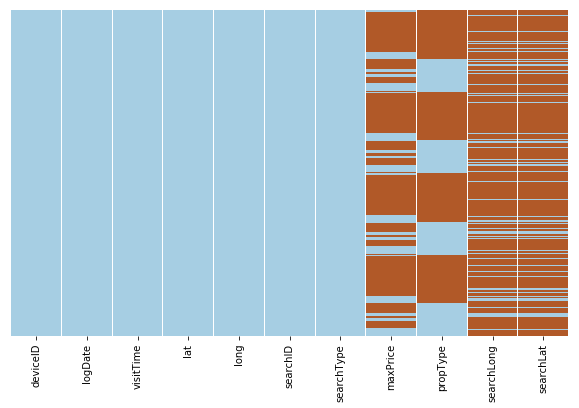

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Paired')

In [12]:
# 80% search without using phone's location 
df['searchLong'].value_counts(dropna=False)[np.nan] / len(df['searchLong'])

0.80226658098374704

In [13]:
df['propType'].value_counts()

N    27139
H    22724
L     8073
R     1364
I      460
O      327
D       53
Name: propType, dtype: int64

In [167]:
df['propType'].value_counts().sum() / len(df['propType'])

0.40257584277184244

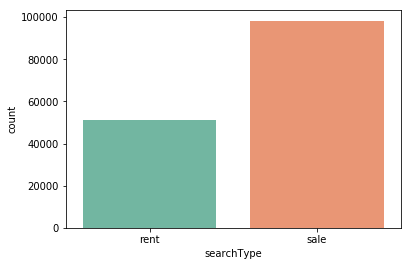

In [133]:
sns.countplot(df['searchType'], palette='Set2')

In [7]:
df['logDate'].min()

'2017-10-23 08:02:18.063625 UTC'

In [8]:
df['logDate'].max()

'2017-10-31 10:08:14.794585 UTC'